In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("buy_the_dips.csv")

In [3]:
df

,Date,Day Traded,$USD,SPY,TQQQ
0,2025-02-19,Yes,-,100.0%,-
1,2025-02-18,Yes,-,100.0%,-
2,2025-02-14,Yes,-,100.0%,-
3,2025-02-13,Yes,-,100.0%,-
4,2025-02-12,Yes,-,100.0%,-
...,...,...,...,...,...
1252,2020-02-26,Yes,2.0%,-,98.0%
1253,2020-02-25,Yes,2.0%,-,98.0%
1254,2020-02-24,Yes,1.8%,-,98.2%
1255,2020-02-21,Yes,1.8%,98.2%,-


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def visualize_holdings_distribution(csv_path, output_path=None):
    """
    Create a dark theme bar chart showing holding frequency and position sizes from portfolio holdings data.
    
    Parameters:
    -----------
    csv_path : str
        Path to the CSV file containing portfolio holdings data.
        Expected columns: Date, $USD, SPY, TQQQ (or similar structure with security columns)
    output_path : str, optional
        Path to save the visualization. If None, displays the plot instead.
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The generated figure object
    """
    # Read the CSV file
    df = pd.read_csv(csv_path)
    
    # Calculate metrics for each security
    holdings_data = {}
    
    # Process each security column (excluding Date and $USD)
    security_columns = [col for col in df.columns if col not in ['Date', '$USD', 'Day Traded']]
    
    for security in security_columns:
        # Calculate holding frequency (percentage of days held)
        # Consider a security held when its value is not '-'
        held_days = df[df[security] != '-'].shape[0]
        freq = (held_days / len(df)) * 100
        
        # Calculate average position size when held
        # Convert percentage strings to numeric values
        position_sizes = df[security].replace('-', '0%').str.rstrip('%').astype(float)
        avg_size = position_sizes[position_sizes > 0].mean()
        
        holdings_data[security] = {
            'frequency': freq,
            'avg_size': avg_size
        }
        
        print(f"{security}:")
        print(f"  Frequency: {freq:.2f}%")
        print(f"  Avg Size: {avg_size:.2f}%")
    
    # Prepare data for plotting
    securities = list(holdings_data.keys())
    frequencies = [holdings_data[sec]['frequency'] for sec in securities]
    avg_sizes = [holdings_data[sec]['avg_size'] for sec in securities]
    
    # Set dark background style
    plt.style.use('dark_background')
    
    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))
    fig.patch.set_facecolor('#1a1a1a')
    ax1.set_facecolor('#1a1a1a')
    
    # Set up the first axis for holding frequency
    x = np.arange(len(securities))
    width = 0.35
    
    # Define colors with higher contrast for dark mode
    frequency_color = '#a58cdb'  # Light purple
    size_color = '#90EE90'       # Light green
    
    bars1 = ax1.bar(x - width/2, frequencies, width, label='Holding Frequency (%)', 
                    color=frequency_color, alpha=0.8)
    ax1.set_ylabel('Holding Frequency (%)', color='white')
    ax1.set_ylim(0, 100)
    
    # Set up the second axis for position size
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x + width/2, avg_sizes, width, label='Avg Position Size (%)',
                    color=size_color, alpha=0.8)
    ax2.set_ylabel('Avg Position Size (%)', color='white')
    ax2.set_ylim(0, 100)
    
    # Customize the plot
    ax1.set_xticks(x)
    ax1.set_xticklabels(securities, color='white')
    plt.title('Security Holding Frequency and Position Size', color='white', pad=20)
    
    # Style the axes
    ax1.tick_params(colors='white')
    ax2.tick_params(colors='white')
    
    # Add gridlines with lower opacity
    ax1.grid(True, linestyle='--', alpha=0.2)
    
    # Style the spines
    for spine in ax1.spines.values():
        spine.set_color('#555555')
    for spine in ax2.spines.values():
        spine.set_color('#555555')
    
    # Combine legends with white text
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    leg = ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    for text in leg.get_texts():
        text.set_color('white')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save or display the plot
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='#1a1a1a')
    plt.show()
    return #fig

SPY:
  Frequency: 95.47%
  Avg Size: 99.46%
TQQQ:
  Frequency: 4.53%
  Avg Size: 99.11%


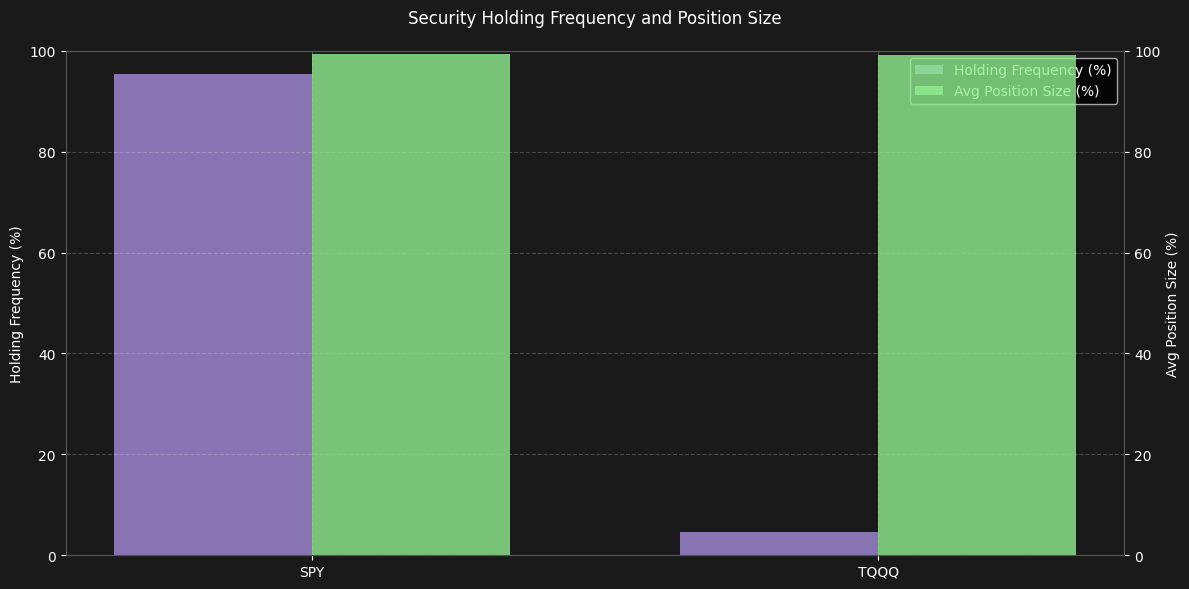

In [14]:
visualize_holdings_distribution("buy_the_dips.csv")

GLD:
  Frequency: 57.19%
  Avg Size: 33.93%
QQQ:
  Frequency: 37.69%
  Avg Size: 99.78%
TQQQ:
  Frequency: 2.31%
  Avg Size: 99.35%
UUP:
  Frequency: 57.19%
  Avg Size: 65.72%
UVXY:
  Frequency: 2.81%
  Avg Size: 99.81%


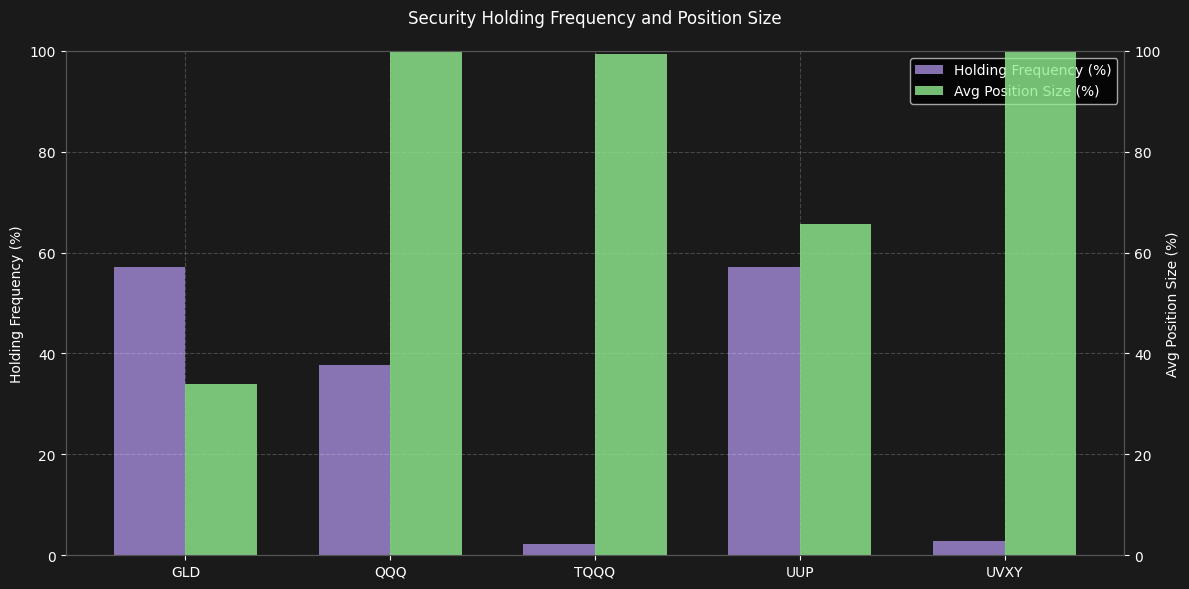

In [15]:
visualize_holdings_distribution("bull_or_hedge.csv")

UPRO:
  Frequency: 0.82%
  Avg Size: 99.83%
OKTA:
  Frequency: 16.21%
  Avg Size: 33.29%
AVGO:
  Frequency: 39.51%
  Avg Size: 33.27%
FTNT:
  Frequency: 21.39%
  Avg Size: 33.27%
QQQ:
  Frequency: 1.77%
  Avg Size: 52.92%
PANW:
  Frequency: 21.39%
  Avg Size: 33.27%
S:
  Frequency: 21.66%
  Avg Size: 33.30%
BTAL:
  Frequency: 3.81%
  Avg Size: 24.99%
TQQQ:
  Frequency: 8.31%
  Avg Size: 99.35%
CRWD:
  Frequency: 35.01%
  Avg Size: 33.29%
UVXY:
  Frequency: 6.68%
  Avg Size: 85.68%
NET:
  Frequency: 24.25%
  Avg Size: 33.29%
SQQQ:
  Frequency: 19.35%
  Avg Size: 71.59%
ZS:
  Frequency: 14.71%
  Avg Size: 33.30%
PSQ:
  Frequency: 7.22%
  Avg Size: 64.48%


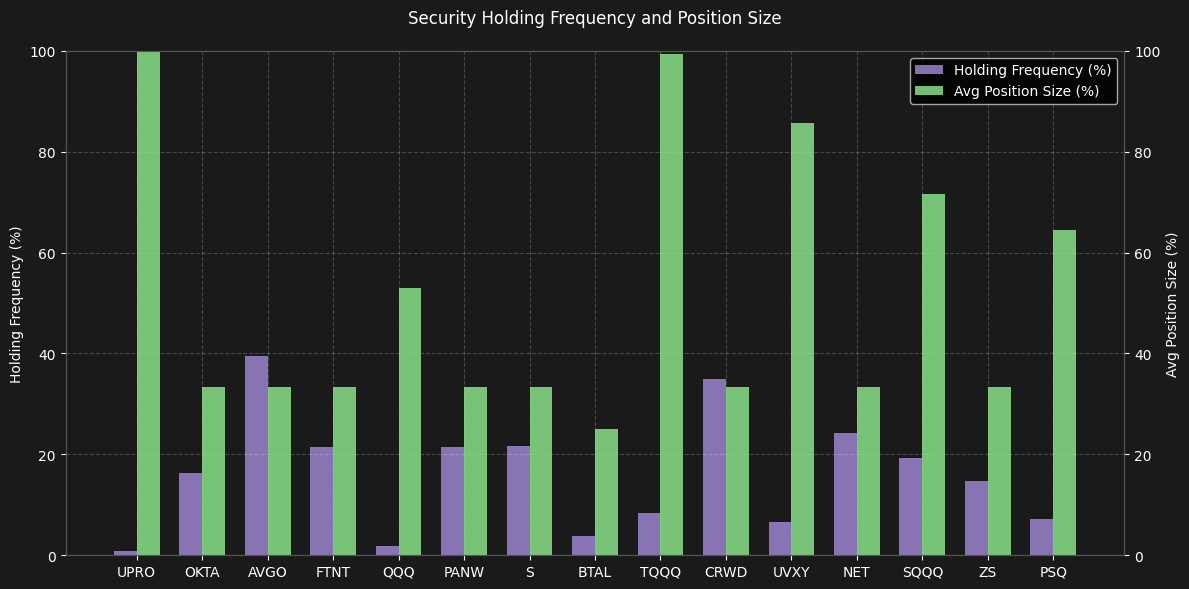

In [16]:
visualize_holdings_distribution("cybersecurity.csv")

UPRO:
  Frequency: 0.82%
  Avg Size: 99.87%
BWXT:
  Frequency: 48.97%
  Avg Size: 33.28%
LEU:
  Frequency: 33.06%
  Avg Size: 33.30%
OKLO:
  Frequency: 34.29%
  Avg Size: 33.29%
QQQ:
  Frequency: 1.78%
  Avg Size: 52.92%
EXC:
  Frequency: 13.17%
  Avg Size: 33.28%
SMR:
  Frequency: 29.36%
  Avg Size: 33.30%
BTAL:
  Frequency: 3.84%
  Avg Size: 24.99%
TQQQ:
  Frequency: 8.37%
  Avg Size: 99.37%
UVXY:
  Frequency: 6.72%
  Avg Size: 85.69%
NLR:
  Frequency: 34.98%
  Avg Size: 33.28%
SQQQ:
  Frequency: 19.34%
  Avg Size: 71.42%
PSQ:
  Frequency: 7.27%
  Avg Size: 64.50%


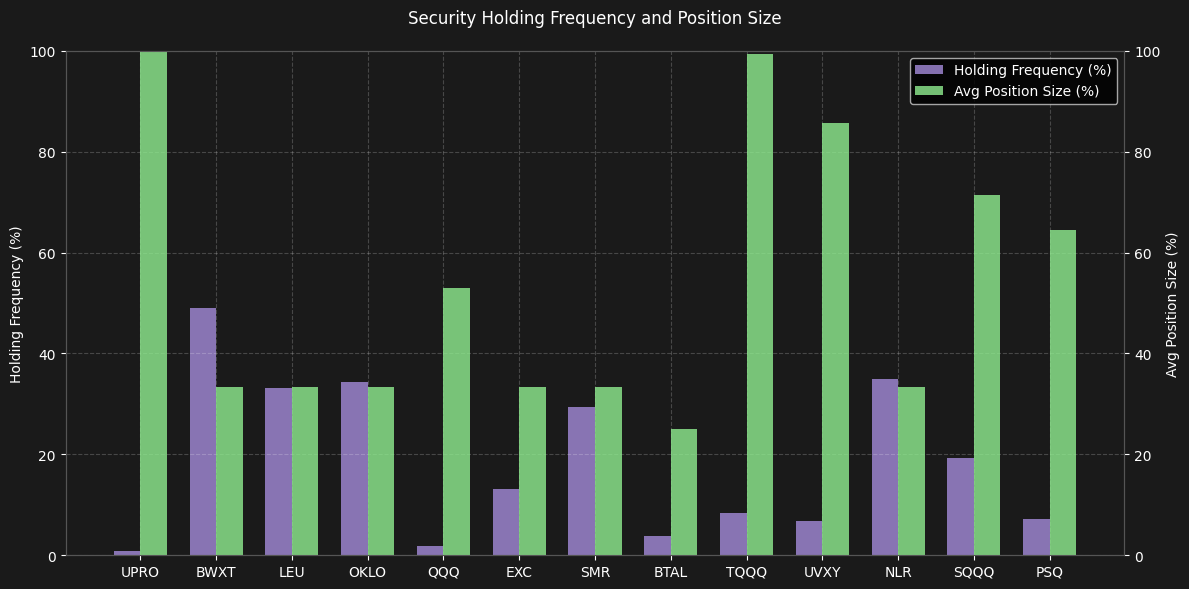

In [17]:
visualize_holdings_distribution("nuclear.csv")

AMZA:
  Frequency: 97.15%
  Avg Size: 48.74%
BIL:
  Frequency: 1.42%
  Avg Size: 74.88%
CII:
  Frequency: 97.15%
  Avg Size: 48.43%
SOXL:
  Frequency: 3.20%
  Avg Size: 33.11%
SPXL:
  Frequency: 3.38%
  Avg Size: 33.17%
TQQQ:
  Frequency: 2.85%
  Avg Size: 33.17%
UVXY:
  Frequency: 2.14%
  Avg Size: 49.92%


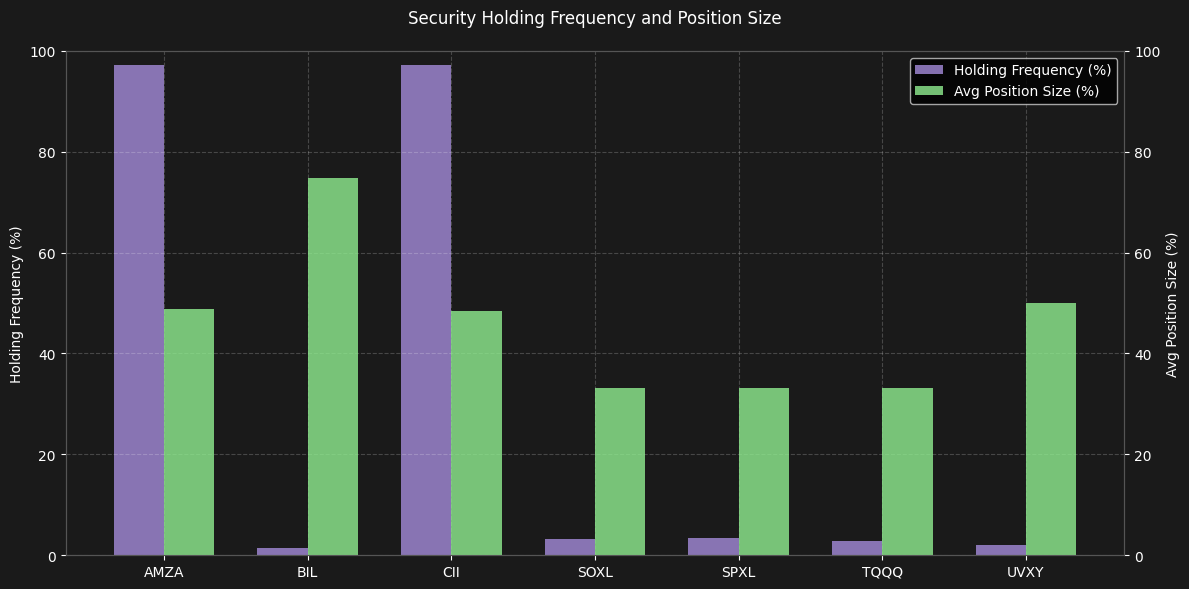

In [18]:
visualize_holdings_distribution("mo_div_blk_swn.csv")

VOX:
  Frequency: 37.67%
  Avg Size: 33.17%
VDE:
  Frequency: 41.87%
  Avg Size: 33.40%
VNQ:
  Frequency: 9.99%
  Avg Size: 32.91%
VDC:
  Frequency: 18.00%
  Avg Size: 32.54%
VHT:
  Frequency: 15.94%
  Avg Size: 32.85%
VAW:
  Frequency: 9.75%
  Avg Size: 31.98%
VFH:
  Frequency: 39.49%
  Avg Size: 33.30%
VPU:
  Frequency: 29.18%
  Avg Size: 32.95%
VCR:
  Frequency: 34.02%
  Avg Size: 33.22%
VGT:
  Frequency: 48.93%
  Avg Size: 33.12%
VIS:
  Frequency: 15.15%
  Avg Size: 33.26%


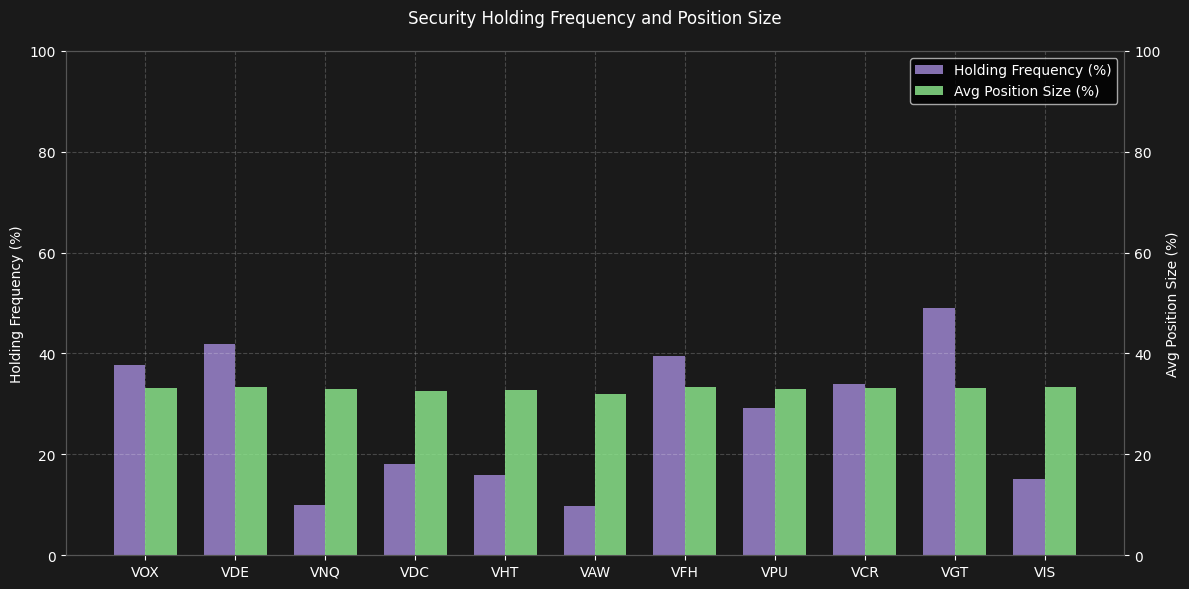

In [25]:
visualize_holdings_distribution("trending_sector.csv")

ASML:
  Frequency: 21.41%
  Avg Size: 24.46%
AZN:
  Frequency: 5.31%
  Avg Size: 24.07%
KO:
  Frequency: 1.68%
  Avg Size: 22.86%
GOOGL:
  Frequency: 10.46%
  Avg Size: 24.16%
AVGO:
  Frequency: 34.30%
  Avg Size: 24.84%
PEP:
  Frequency: 0.00%
  Avg Size: nan%
MRK:
  Frequency: 7.41%
  Avg Size: 25.04%
NVO:
  Frequency: 29.41%
  Avg Size: 24.63%
NVDA:
  Frequency: 47.97%
  Avg Size: 25.21%
JNJ:
  Frequency: 2.96%
  Avg Size: 24.36%
LLY:
  Frequency: 29.24%
  Avg Size: 24.86%
BAC:
  Frequency: 20.58%
  Avg Size: 24.83%
AAPL:
  Frequency: 25.80%
  Avg Size: 24.62%
MA:
  Frequency: 24.21%
  Avg Size: 24.79%
BRK/B:
  Frequency: 3.58%
  Avg Size: 24.27%
AMZN:
  Frequency: 24.43%
  Avg Size: 24.66%
UNH:
  Frequency: 23.37%
  Avg Size: 24.79%
ORCL:
  Frequency: 8.72%
  Avg Size: 24.66%
V:
  Frequency: 17.03%
  Avg Size: 24.48%
PFE:
  Frequency: 2.91%
  Avg Size: 24.52%
NVS:
  Frequency: 0.00%
  Avg Size: nan%
CL:
  Frequency: 0.56%
  Avg Size: 24.72%
TSM:
  Frequency: 15.77%
  Avg Size: 24.7

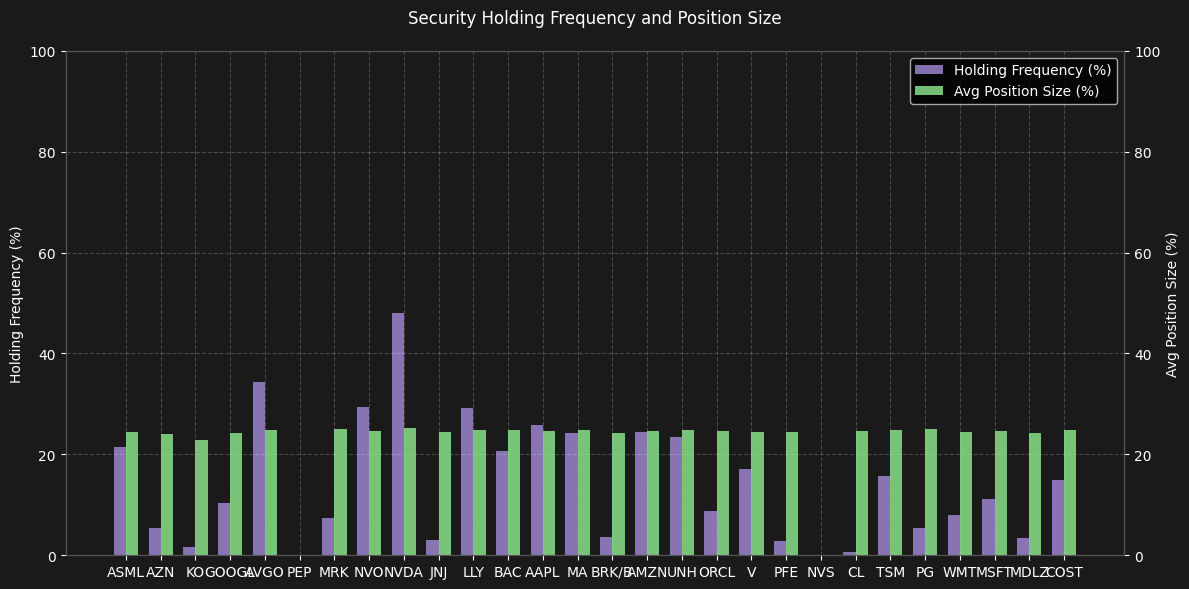

In [27]:
visualize_holdings_distribution("megacap.csv")

SHY:
  Frequency: 81.71%
  Avg Size: 69.10%
UPRO:
  Frequency: 57.33%
  Avg Size: 75.43%


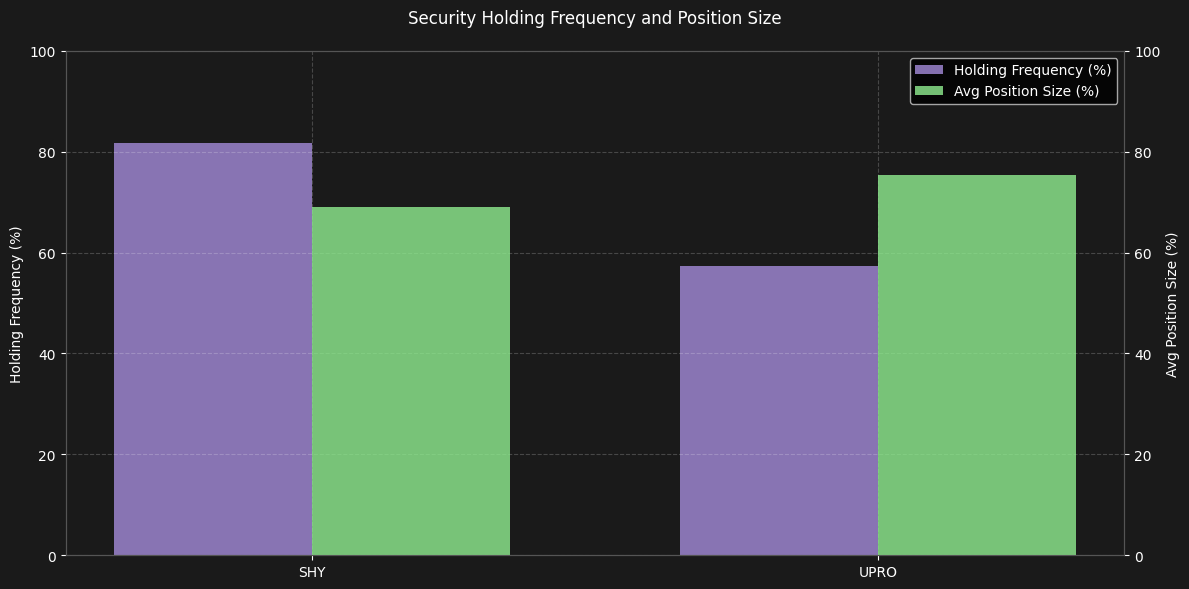

In [21]:
visualize_holdings_distribution("fundsurfing.csv")

ENPH:
  Frequency: 34.26%
  Avg Size: 99.46%
SOXX:
  Frequency: 0.40%
  Avg Size: 96.52%
DBC:
  Frequency: 0.20%
  Avg Size: 95.18%
NVDA:
  Frequency: 36.21%
  Avg Size: 98.91%
XLE:
  Frequency: 7.12%
  Avg Size: 100.00%
SSO:
  Frequency: 2.35%
  Avg Size: 97.18%
AMD:
  Frequency: 18.98%
  Avg Size: 98.53%
VIXM:
  Frequency: 0.48%
  Avg Size: 99.98%


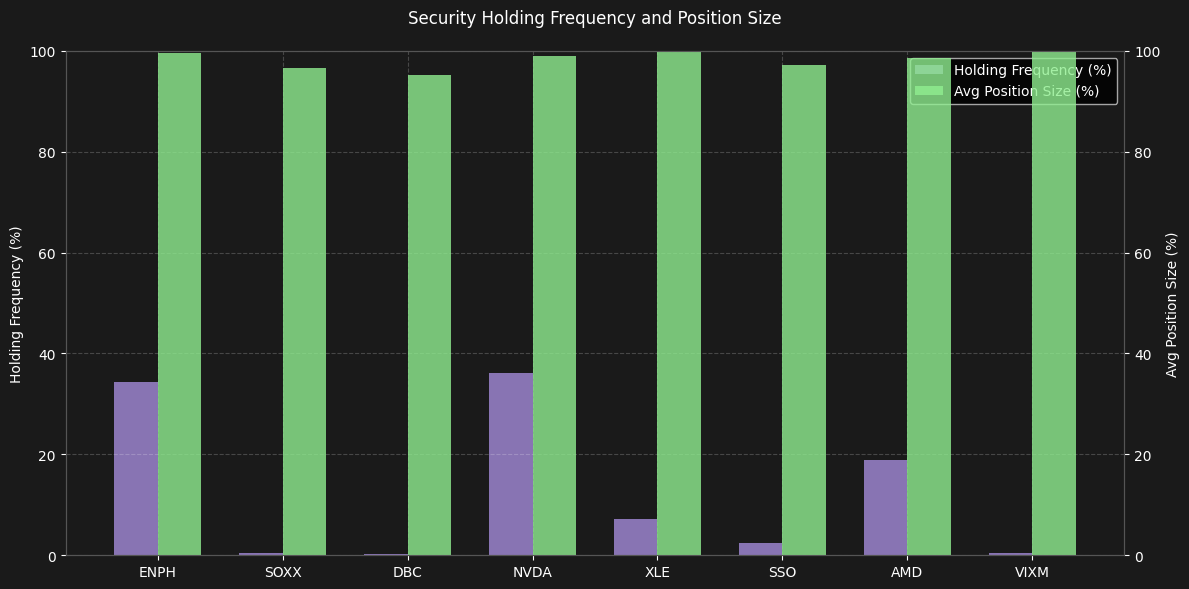

In [28]:
visualize_holdings_distribution("sso_energy.csv")

USDU:
  Frequency: 2.58%
  Avg Size: 99.98%
SOXL:
  Frequency: 0.94%
  Avg Size: 99.70%
TMF:
  Frequency: 1.88%
  Avg Size: 100.00%
BITI:
  Frequency: 3.05%
  Avg Size: 99.85%
SVXY:
  Frequency: 1.64%
  Avg Size: 50.00%
SPXL:
  Frequency: 0.94%
  Avg Size: 99.85%
ERX:
  Frequency: 0.94%
  Avg Size: 99.88%
TECL:
  Frequency: 66.20%
  Avg Size: 99.77%
BTAL:
  Frequency: 0.00%
  Avg Size: nan%
MSTR:
  Frequency: 9.62%
  Avg Size: 99.79%
UVXY:
  Frequency: 12.21%
  Avg Size: 99.78%
VIXM:
  Frequency: 1.64%
  Avg Size: 50.00%
BIL:
  Frequency: 0.00%
  Avg Size: nan%


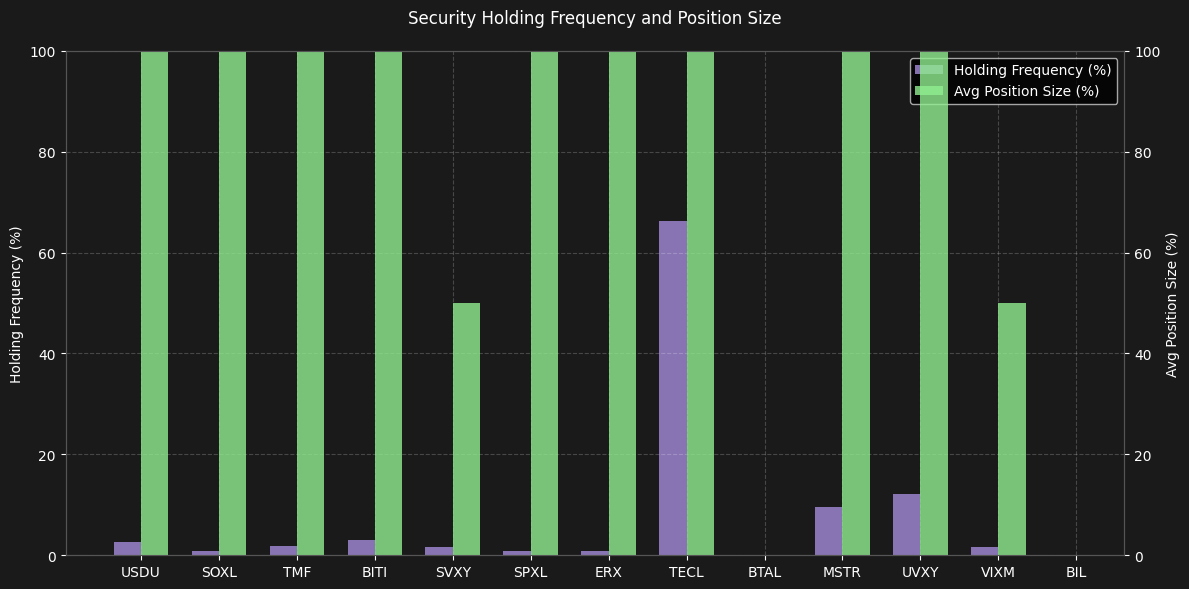

In [ ]:
visualize_holdings_distribution("magic_internet_money.csv") #can't go back further

META:
  Frequency: 44.88%
  Avg Size: 24.90%
ASML:
  Frequency: 11.42%
  Avg Size: 24.93%
SNOW:
  Frequency: 17.52%
  Avg Size: 24.98%
IEF:
  Frequency: 0.59%
  Avg Size: 33.17%
VOO:
  Frequency: 0.20%
  Avg Size: 32.60%
SOXX:
  Frequency: 73.23%
  Avg Size: 12.47%
NVDA:
  Frequency: 72.05%
  Avg Size: 24.95%
VNQ:
  Frequency: 0.00%
  Avg Size: nan%
ROBO:
  Frequency: 3.54%
  Avg Size: 12.49%
GOOG:
  Frequency: 9.45%
  Avg Size: 24.94%
VTI:
  Frequency: 0.20%
  Avg Size: 33.10%
BOTZ:
  Frequency: 45.28%
  Avg Size: 12.47%
SLV:
  Frequency: 0.98%
  Avg Size: 33.18%
TSLA:
  Frequency: 38.98%
  Avg Size: 24.96%
XLU:
  Frequency: 0.00%
  Avg Size: nan%
AMD:
  Frequency: 26.38%
  Avg Size: 24.86%
GLD:
  Frequency: 1.57%
  Avg Size: 33.21%
ISRG:
  Frequency: 5.71%
  Avg Size: 24.98%
VGT:
  Frequency: 74.80%
  Avg Size: 12.47%
PLTR:
  Frequency: 67.32%
  Avg Size: 24.94%
USMV:
  Frequency: 0.00%
  Avg Size: nan%
MSFT:
  Frequency: 1.57%
  Avg Size: 24.88%
BND:
  Frequency: 1.18%
  Avg Size: 3

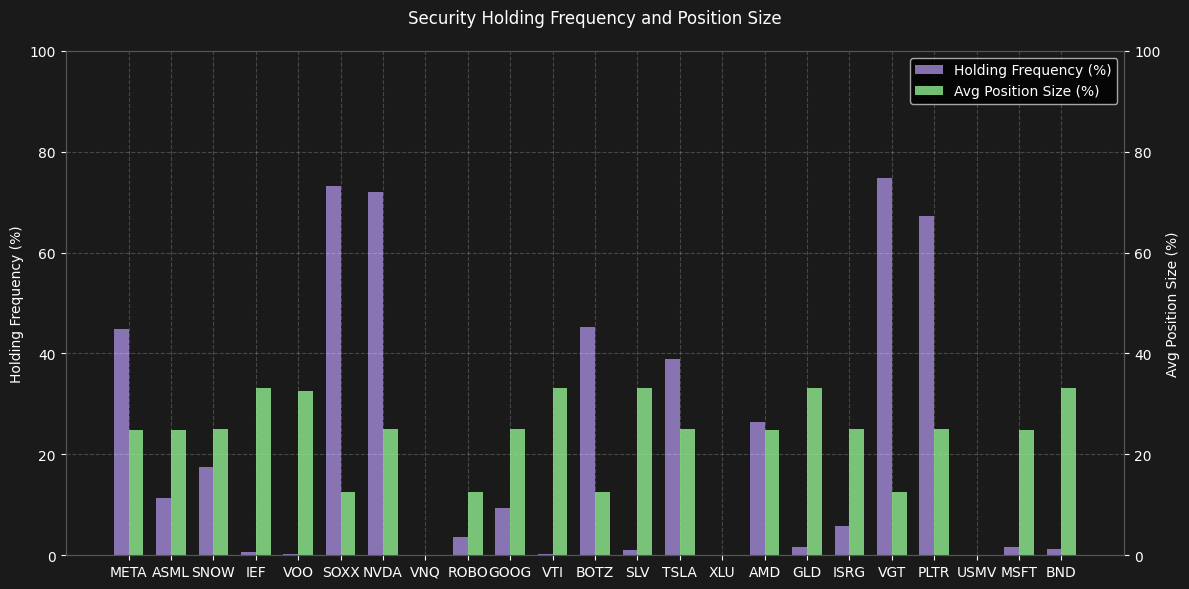

In [29]:
visualize_holdings_distribution("tech_focused_basic_risk.csv")